# Deeper into Animations

> see 05_Animate_AOI for better documentation 

- Tony is just playing here



In [1]:
! pwd
! ls /home/jovyan/examples/Scripts

/home/jovyan/notebook/03-SANDBOX-specific-demos/00-GA-africa-admin-sandbox
__pycache__		 deafrica_coastaltools.py  deafrica_plotting.py
deafrica_bandindices.py  deafrica_datahandling.py  deafrica_spatialtools.py


In [2]:
%matplotlib inline

import datacube
import sys
from odc.ui import with_ui_cbk

sys.path.append("/home/jovyan/examples/Scripts")
from deafrica_plotting import display_map
from deafrica_plotting import rgb
from deafrica_plotting import animated_timeseries



### Connect to the datacube
We then connect to the datacube database so we can load DE Africa data. 

In [3]:
dc = datacube.Datacube(app="05__deep_dive_Animating")

### Analysis parameters

The following variables are required to establish a query for this notebook:
- `lat_range`: The latitude range to analyse (e.g. `(11.72, 11.52)`). For reasonable load times, keep this to a range of ~0.1 degrees or less.
- `lon_range`: The longitude range to analyse (e.g. `(-15.63, -15.43)`). For reasonable load times, keep this to a range of ~0.1 degrees or less.
- `time_range`: The date range to analyse (e.g. `("2018-01-01", "2018-03-30")`).


In [4]:
lat_range = (11.72, 11.52)
lon_range = (-15.63, -15.43)
time_range = ("2013-01-01", "2019-12-31")


In [5]:
display_map(x=lon_range, y=lat_range)

## Query and view data
The variables determined above are used here to query the DE Africa datacube using the `dc.load()` function and load data introduced in the [Loading data notebook](04_Loading_data.ipynb).
This introduction will to use Landsat 8 Surface reflectance `usgs_ls8c_level2_2`.

In [6]:
ds = dc.load(product="ls8_usgs_sr_scene",
             measurements=['blue','green','red','nir','swir1','swir2'],
             x=lon_range,
             y=lat_range,
             time=time_range,
             output_crs='EPSG:6933',
             progress_cbk=with_ui_cbk(),
             resolution=(-30, 30))

print(ds)

<xarray.Dataset>
Dimensions:  (time: 94, x: 644, y: 834)
Coordinates:
  * time     (time) datetime64[ns] 2013-05-03T11:23:53.310888 ... 2018-01-25T11:22:02.430782
  * y        (y) float64 1.485e+06 1.485e+06 1.485e+06 ... 1.46e+06 1.46e+06
  * x        (x) float64 -1.508e+06 -1.508e+06 ... -1.489e+06 -1.489e+06
Data variables:
    blue     (time, y, x) int16 910 919 929 932 944 941 ... 611 609 612 611 613
    green    (time, y, x) int16 1276 1289 1310 1318 1341 ... 776 774 775 775 779
    red      (time, y, x) int16 1171 1211 1258 1315 1373 ... 527 526 524 525 525
    nir      (time, y, x) int16 374 399 449 510 601 604 ... 382 378 376 380 377
    swir1    (time, y, x) int16 193 201 206 216 219 215 ... 255 250 254 256 254
    swir2    (time, y, x) int16 153 158 163 169 176 171 ... 196 203 200 201 199
Attributes:
    crs:      EPSG:6933


In [8]:
from notebookLib.nb_animate import nb_animated_timeseries

Generating 94 frame animation
    Exporting animation to ./deep_bolama10.mp4


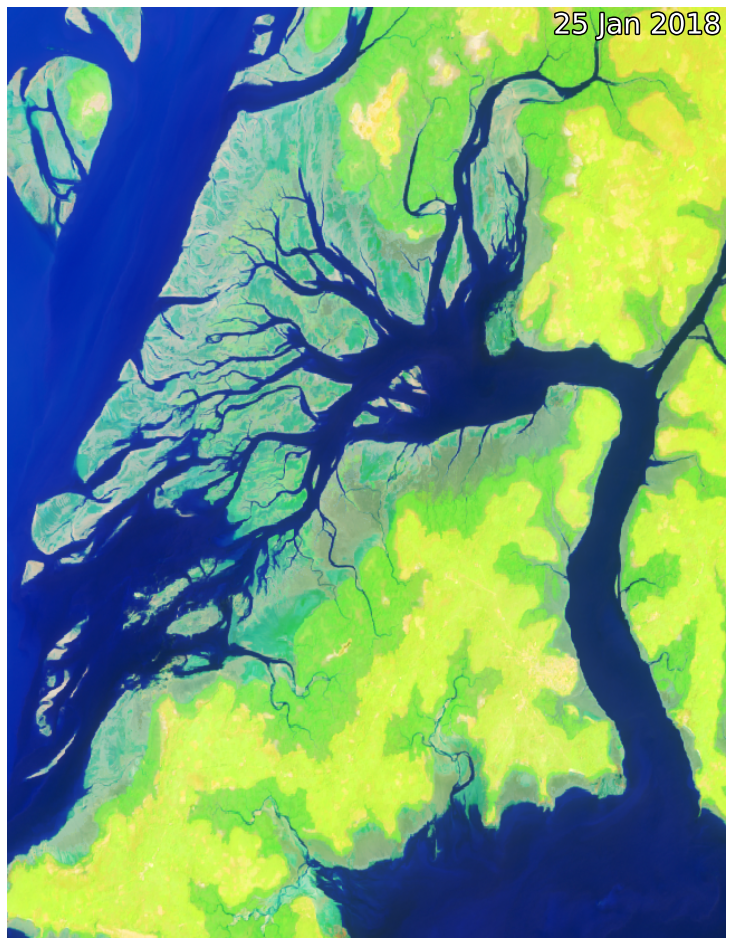

In [10]:
nb_animated_timeseries(ds,output_path='./deep_bolama10.mp4',bands = ['swir1', 'nir', 'green'], time_dim='time',  
      interval=500)

In [11]:
!ls -l deep*

-rw-r--r-- 1 jovyan users 41985106 Jan 22 17:45 deep_bolama10.gif
-rw-r--r-- 1 jovyan users  6734707 Jan 22 17:59 deep_bolama10.mp4


In [ ]:
nb_animated_timeseries(ds,output_path='./deep_bolama_stretch10.gif',bands = ['red', 'green', 'blue'], time_dim='time',  
      percentile_stretch=(.2,.85), interval=600)

In [5]:
help(nb_animated_timeseries)

NameError: name 'nb_animated_timeseries' is not defined